# Lab 1: Processamento de Imagens e Equalização de Histograma

Este notebook apresenta a implementação e análise de técnicas de equalização de histograma em imagens. O objetivo é explorar o impacto desse processamento na melhoria de contraste em imagens de baixa qualidade, tanto em escala de cinza quanto em imagens coloridas.

**Equipe:** 

Allan Hirose Pires de Souza

Juliana dos Santos Silva

Kaike Nascimento Souza

In [1]:
!pip install opencv-python matplotlib numpy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [3]:
def baixar_imagem(url):
    req = urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) 
    return img

## Parte 1: Equalização em Escala de Cinza

Para este experimento, selecionamos três imagens diferentes para avaliar a eficácia da equalização global de histograma.

In [5]:
urls = [
    "https://picsum.photos/id/237/500/500",
    "https://picsum.photos/id/238/500/500",
    "https://picsum.photos/id/239/500/500",
]

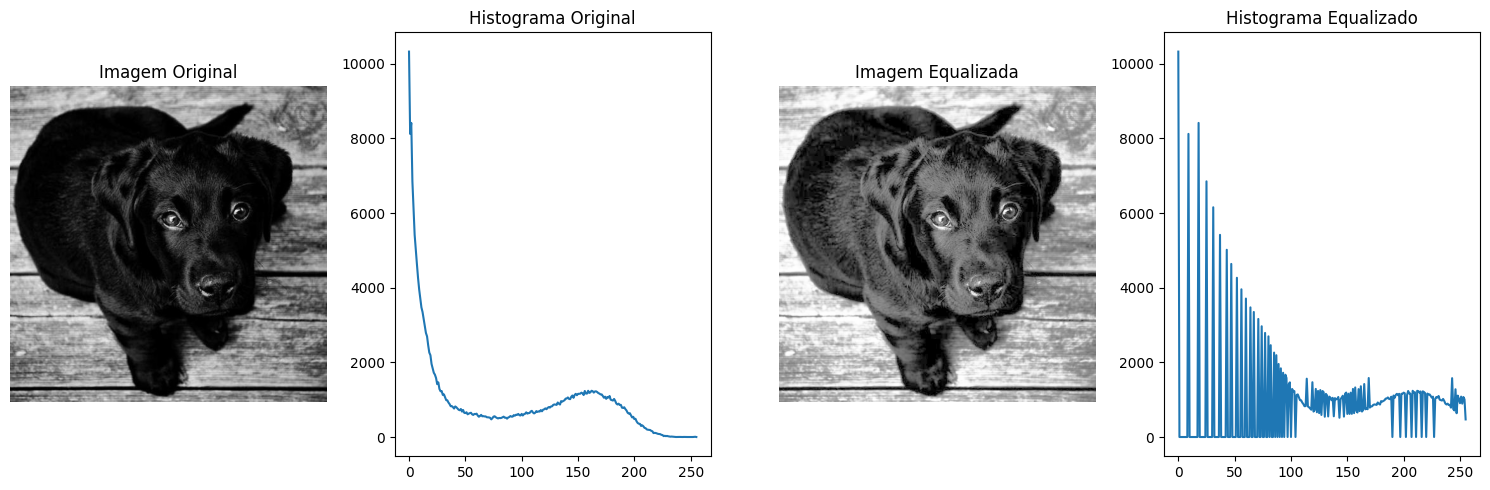

In [6]:
# Imagem 1: Paisagem com baixo contraste
url1 = urls[0]
img1 = baixar_imagem(url1) 

# Conversão para escala de cinza
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Cálculo do histograma original
hist_antes = cv2.calcHist([img1_gray],[0],None,[256],[0,256])

# Aplicação da equalização de histograma
img1_eq = cv2.equalizeHist(img1_gray)

# Cálculo do histograma após equalização
hist_depois = cv2.calcHist([img1_eq],[0],None,[256],[0,256])

# Visualização dos resultados
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(img1_gray, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.plot(hist_antes)
plt.title('Histograma Original')

plt.subplot(1,4,3)
plt.imshow(img1_eq, cmap='gray')
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(1,4,4)
plt.plot(hist_depois)
plt.title('Histograma Equalizado')

plt.tight_layout()
plt.show()

**Análise da Imagem 1:**
Observa-se que o histograma da imagem original estava concentrado na faixa de cinza mais escuro, indicando que a imagem tinha muitos pixels com valores de cinza baixos. Após a equalização, houve uma distribuição mais uniforme das intensidades de cinza, resultando em uma imagem com mais detalhes, principalmente nas áreas mais escuras. A equalização ajudou a realçar os detalhes que estavam ocultos na imagem original. 

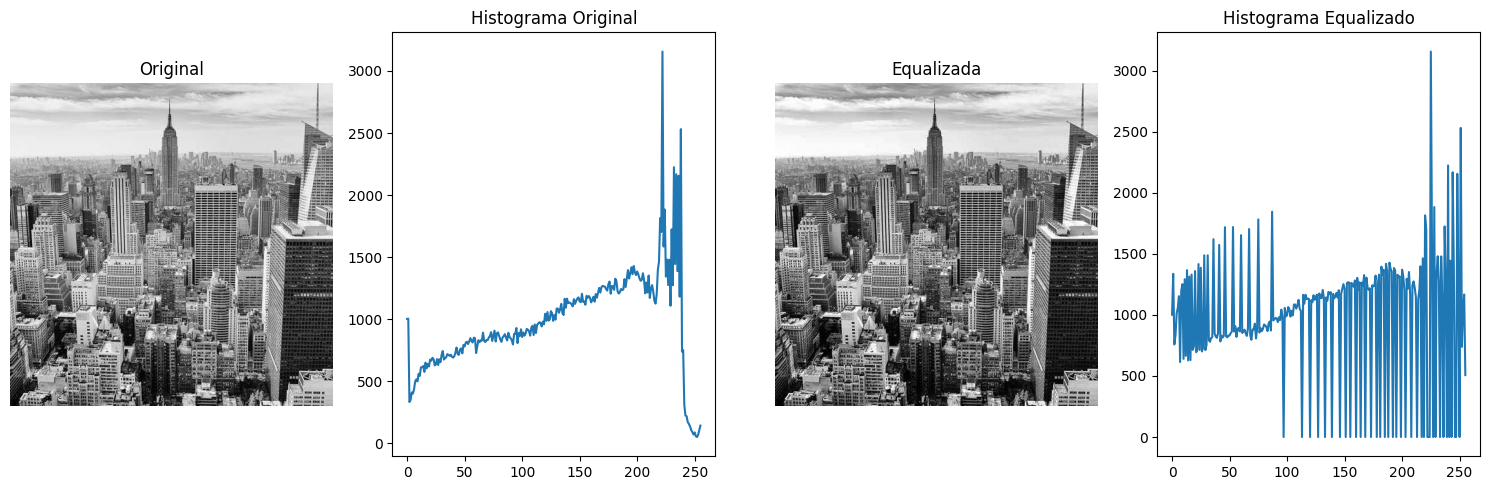

In [ ]:
# Imagem 2: Objeto em fundo claro (Gato na neve)
url2 = urls[1]
img2 = baixar_imagem(url2)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

hist2_antes = cv2.calcHist([img2_gray],[0],None,[256],[0,256])
img2_eq = cv2.equalizeHist(img2_gray)
hist2_depois = cv2.calcHist([img2_eq],[0],None,[256],[0,256])

plt.figure(figsize=(15,5))
plt.subplot(1,4,1); plt.imshow(img2_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,4,2); plt.plot(hist2_antes); plt.title('Histograma Original')
plt.subplot(1,4,3); plt.imshow(img2_eq, cmap='gray'); plt.title('Equalizada'); plt.axis('off')
plt.subplot(1,4,4); plt.plot(hist2_depois); plt.title('Histograma Equalizado')
plt.tight_layout()
plt.show()

**Análise da Imagem 2:**
Neste caso, a imagem original possui um histograma mais balanceado, com uma concetração maior em píxels mais claros. Após a equalização, a imagem se torna mais contraste, com uma distribuição mais uniforme de píxels, com mais detalhes em tons de cinza mais escuros. Mas pouco perceptível no final.

/tmp/ipython-input-2699115177.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img3_gray.ravel(),256,[0,256])
/tmp/ipython-input-2699115177.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img3_eq.ravel(),256,[0,256])


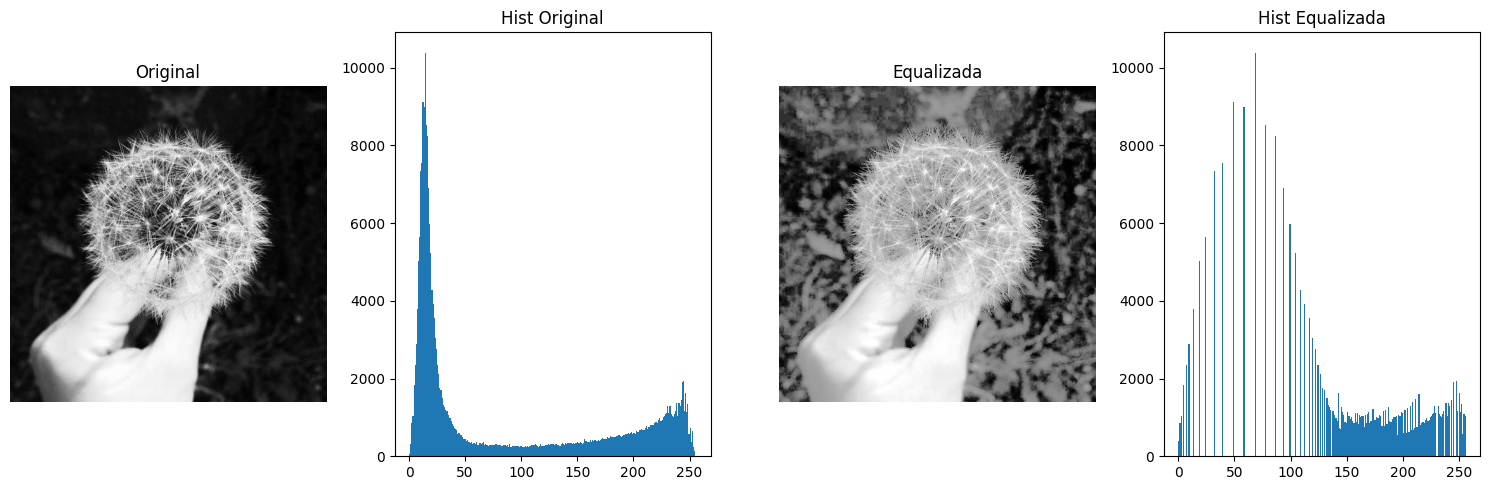

In [11]:
# Imagem 3: Retrato padrão (Lena)
url3 = urls[2]
img3 = baixar_imagem(url3)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img3_eq = cv2.equalizeHist(img3_gray)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(img3_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.hist(img3_gray.ravel(),256,[0,256])
plt.title('Hist Original')

plt.subplot(1,4,3)
plt.imshow(img3_eq, cmap='gray')
plt.title('Equalizada')
plt.axis('off')

plt.subplot(1,4,4)
plt.hist(img3_eq.ravel(),256,[0,256])
plt.title('Hist Equalizada')

plt.tight_layout()
plt.show()

**Análise da Imagem 3:**
A imagem origial possui um contraste muito elevado. Com uma densidade alta de pixels muito claros e muito escuros. Após a equalização, a imagem perdeu o contraste elevado, mas ainda possui uma distribuição de pixels muito desigual. É perceptível o aumento de detalhe nas áreas escuras da imagem.

## Parte 2: Equalização em Canais RGB

Aqui realizamos a equalização separadamente em cada um dos canais de cor (R, G, B) e depois recompomos a imagem. Analisaremos o impacto dessa abordagem na fidelidade das cores.

In [33]:
urls_cor = [
    "https://picsum.photos/id/222/500/500",
    "https://picsum.photos/id/223/500/500",
    "https://picsum.photos/id/225/500/500",
]

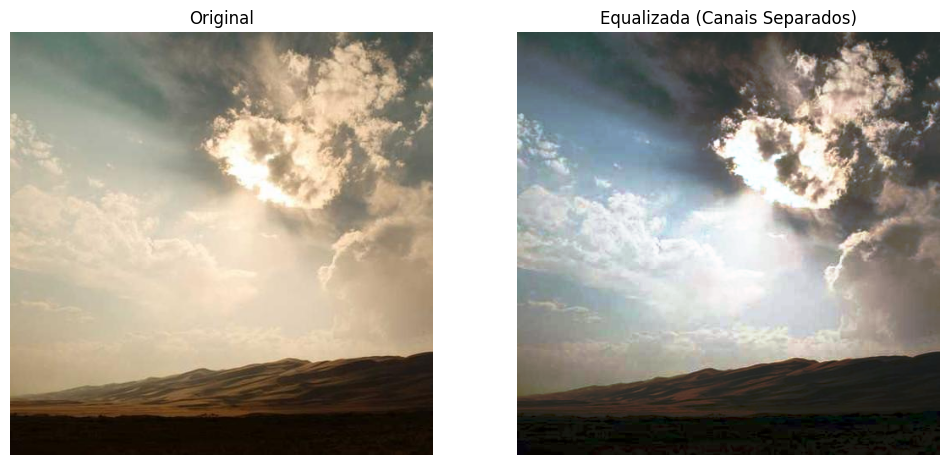

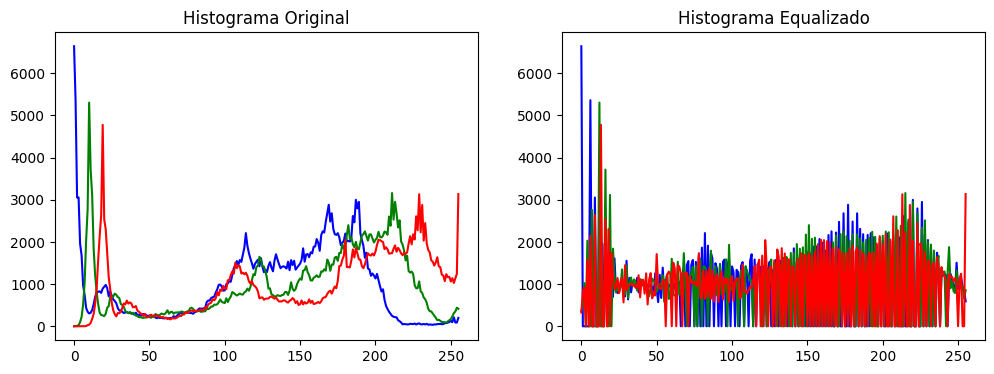

In [34]:
url_cor1 = urls_cor[0]
img_cor1 = baixar_imagem(url_cor1)

# Separação dos canais BGR
b, g, r = cv2.split(img_cor1)

# Equalização individual de cada canal
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Fusão dos canais equalizados
img_cor1_eq = cv2.merge((b_eq, g_eq, r_eq))

# Conversão para RGB para exibição correta no Matplotlib
img_show1 = cv2.cvtColor(img_cor1, cv2.COLOR_BGR2RGB)
img_show1_eq = cv2.cvtColor(img_cor1_eq, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_show1); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_show1_eq); plt.title('Equalizada (Canais Separados)'); plt.axis('off')
plt.show()

# Comparação dos histogramas por canal
color = ('b','g','r')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title('Histograma Original')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

plt.subplot(1,2,2); plt.title('Histograma Equalizado')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor1_eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.show()

**Análise:**
A equalização independente dos canais alterou significativamente o balanceamento de cores original. Nota-se que a imagem ficou muito azul e perdeu a qualidade original. A equalização também gerou ruídos na imagem, e não melhora a qualidade da imagem.

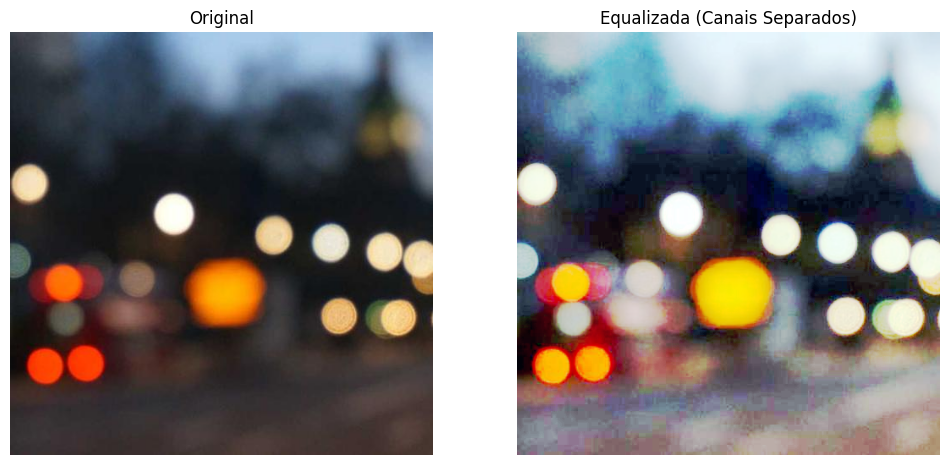

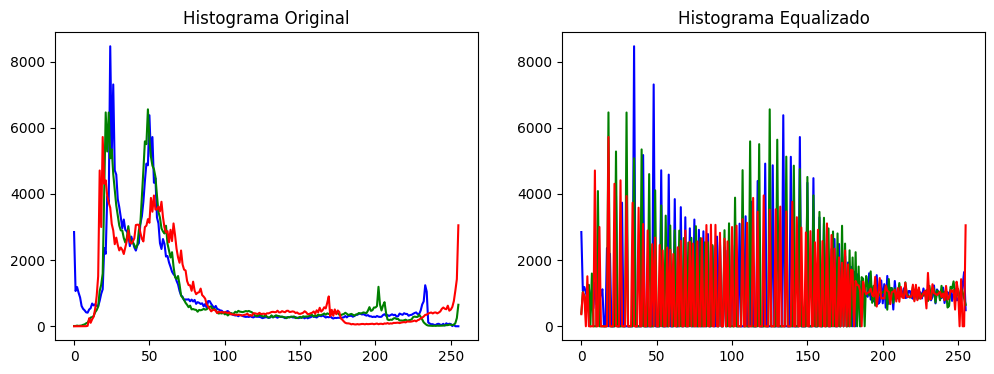

In [35]:
url_cor2 = urls_cor[1]
img_cor2 = baixar_imagem(url_cor2)

# Separação dos canais BGR
b, g, r = cv2.split(img_cor2)

# Equalização individual de cada canal
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Fusão dos canais equalizados
img_cor2_eq = cv2.merge((b_eq, g_eq, r_eq))

# Conversão para RGB para exibição correta no Matplotlib
img_show2 = cv2.cvtColor(img_cor2, cv2.COLOR_BGR2RGB)
img_show2_eq = cv2.cvtColor(img_cor2_eq, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_show2); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_show2_eq); plt.title('Equalizada (Canais Separados)'); plt.axis('off')
plt.show()

# Comparação dos histogramas por canal
color = ('b','g','r')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title('Histograma Original')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

plt.subplot(1,2,2); plt.title('Histograma Equalizado')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor2_eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.show()

**Análise:**
Essa é ma imagem muito peculiar, já que se trata de uma imagem completamente fora de foco. O que gerou resultados interessantes. No histograma da imagem original, vemos uma distribuição de pixels concentrada na área escura e muitos no branco. Apesar da equalização melhorar essa distribuição, gerou muito ruído na imagem. Além do aspecto da imagem nova, parecer mais estourada.

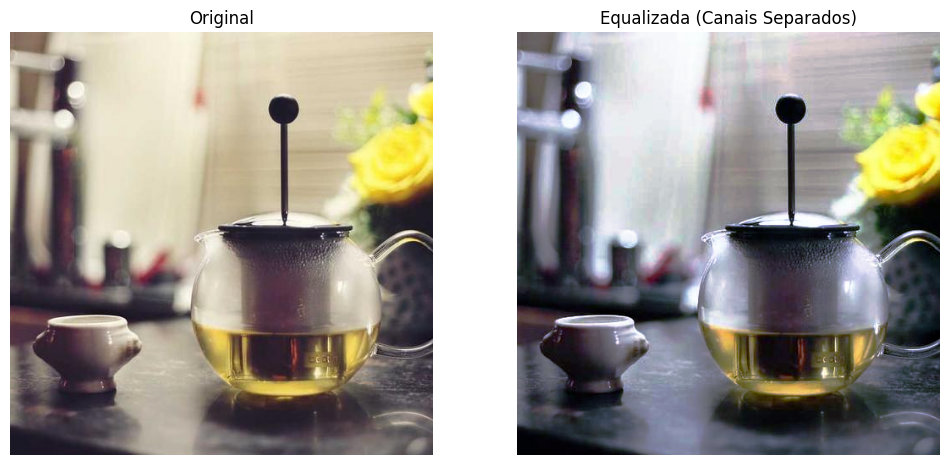

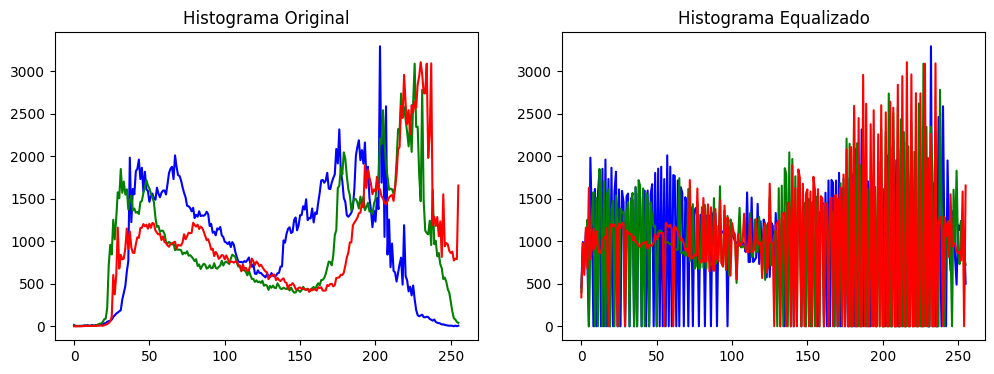

In [36]:
url_cor3 = urls_cor[2]
img_cor3 = baixar_imagem(url_cor3)

# Separação dos canais BGR
b, g, r = cv2.split(img_cor3)

# Equalização individual de cada canal
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Fusão dos canais equalizados
img_cor3_eq = cv2.merge((b_eq, g_eq, r_eq))

# Conversão para RGB para exibição correta no Matplotlib
img_show3 = cv2.cvtColor(img_cor3, cv2.COLOR_BGR2RGB)
img_show3_eq = cv2.cvtColor(img_cor3_eq, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_show3); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_show3_eq); plt.title('Equalizada (Canais Separados)'); plt.axis('off')
plt.show()

# Comparação dos histogramas por canal
color = ('b','g','r')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title('Histograma Original')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor3],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

plt.subplot(1,2,2); plt.title('Histograma Equalizado')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_cor3_eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.show()

**Análise:**
Como nas imagens anteriores, as cores foram completamente alteradas, gerando uma imagem muito distorcida. Também gerou ruído e não melhorou em nada a qualidade da imagem original.